In [1]:
import numpy as np
import ROOT
from sklearn.linear_model import LogisticRegression

# Enable ROOT batch mode for notebook display
ROOT.gROOT.SetBatch(False)
ROOT.gStyle.SetOptStat(0)

# Set random seed for reproducibility
np.random.seed(42)

# Create two samples from different Gaussians
n_samples = 50000
# Create Gaussian distributions for visualization
# Parameters from data generation
mu0, sigma0 = -1.5, 1  # Class 0
mu1, sigma1 = 1.5, 1  # Class 1

# Sample 1: Gaussian with mean=-1.5, std=1, target=0
X1 = np.random.normal(loc=mu0, scale=sigma0, size=n_samples)
y1 = np.zeros(n_samples)

# Sample 2: Gaussian with mean=1.5, std=1, target=1
X2 = np.random.normal(loc=mu1, scale=sigma1, size=n_samples)
y2 = np.ones(n_samples)

# Combine samples
X = np.concatenate([X1, X2]).reshape(-1, 1)
y = np.concatenate([y1, y2])

print(f"Sample 1 (target=0): mean={X1.mean():.2f}, std={X1.std():.2f}")
print(f"Sample 2 (target=1): mean={X2.mean():.2f}, std={X2.std():.2f}")


Sample 1 (target=0): mean=-1.50, std=1.00
Sample 2 (target=1): mean=1.50, std=1.00


In [2]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Get parameters w and b
w = model.coef_[0][0]
b = model.intercept_[0]

print(f"Logistic Regression Parameters:")
print(f"w (weight) = {w:.4f}")
print(f"b (bias) = {b:.4f}")

# Fit standard linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)

# Get linear regression parameters
w_lin = linear_model.coef_[0]
b_lin = linear_model.intercept_

print(f"\nLinear Regression Parameters:")
print(f"w (weight) = {w_lin:.4f}")
print(f"b (bias) = {b_lin:.4f}")

# Create range for plotting
x_range = np.linspace(X.min() - 1, X.max() + 1, 300).reshape(-1, 1)

# Linear function from logistic regression: y = wx + b
y_linear_logistic = w * x_range + b

# Linear regression fit: y = w_lin*x + b_lin
y_linear_fit = w_lin * x_range + b_lin

# Sigmoid function: σ(wx + b)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_sigmoid = sigmoid(w * x_range + b)

# Sigmoid applied to linear regression: σ(w_lin*x + b_lin)
y_sigmoid_linear = sigmoid(w_lin * x_range + b_lin)


Logistic Regression Parameters:
w (weight) = 3.0085
b (bias) = -0.0009

Linear Regression Parameters:
w (weight) = 0.2306
b (bias) = 0.4998


/tmp/ipykernel_133223/1337785359.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gr_linear_fit.SetPoint(i, x_range[i][0], y_linear_fit[i])
/tmp/ipykernel_133223/1337785359.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gr_sigmoid.SetPoint(i, x_range[i][0], y_sigmoid[i])
Error in <TUnixSystem::SetDisplay>: Can't figure out DISPLAY, set it manually
In case you run a remote ssh session, restart your ssh session with:
=========>  ssh -Y
Error in <TUnixSystem::SetDisplay>: Can't figure out DISPLAY, set it manually
In case you run a remote ssh session, restart your ssh session with:
=========>  ssh -Y
Info in <TCanvas::Print>: pdf fi

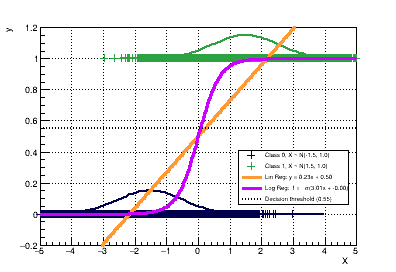

In [ ]:
# Plot with both linear and sigmoid functions using ROOT
c2 = ROOT.TCanvas("c2", "Linear vs Sigmoid", 400, 300)
c2.SetGrid()

# Create TGraphs for scatter data
gr0_2 = ROOT.TGraph(len(X1))
gr1_2 = ROOT.TGraph(len(X2))

for i in range(len(X1)):
    gr0_2.SetPoint(i, X1[i], 0)
    
for i in range(len(X2)):
    gr1_2.SetPoint(i, X2[i], 1)

# Define custom colors: Class 0 RGB(0, 0, 77) and Class 1 RGB(44, 162, 67)
class0_color = ROOT.TColor.GetColor(0, 0, 77)
class1_color = ROOT.TColor.GetColor(44, 162, 67)

gr0_2.SetMarkerStyle(2)  # Plus sign marker
gr0_2.SetMarkerColor(class0_color)
gr0_2.SetMarkerSize(0.8)
gr0_2.SetTitle(";x ;f(x)")

gr1_2.SetMarkerStyle(2)  # Plus sign marker
gr1_2.SetMarkerColor(class1_color)
gr1_2.SetMarkerSize(0.8)

# Create TGraphs for linear regression fit and sigmoid function
gr_linear_fit = ROOT.TGraph(len(x_range))
gr_sigmoid = ROOT.TGraph(len(x_range))

for i in range(len(x_range)):
    gr_linear_fit.SetPoint(i, x_range[i][0], y_linear_fit[i])
    gr_sigmoid.SetPoint(i, x_range[i][0], y_sigmoid[i])

gr_linear_fit.SetLineColor(ROOT.kOrange+1)
gr_linear_fit.SetLineStyle(1)
gr_linear_fit.SetLineWidth(3)

gr_sigmoid.SetLineColor(ROOT.kViolet)
gr_sigmoid.SetLineWidth(3)

# Decision boundary line
gr_boundary = ROOT.TGraph(2)
gr_boundary.SetPoint(0, x_range[0][0], 0.55)
gr_boundary.SetPoint(1, x_range[-1][0], 0.55)
gr_boundary.SetLineColor(ROOT.kBlack)
gr_boundary.SetLineStyle(3)
gr_boundary.SetLineWidth(2)



# Create Gaussian distributions using TF1
# Calculate scale factor to fit nicely in the plot (scale to ~0.15 height)
gauss_max = 1.0 / (sigma0 * np.sqrt(2 * np.pi))  # Maximum of Gaussian at mean
scale_factor = 0.15 / gauss_max

# TF1 for Class 0 Gaussian: scaled and centered at y=0
f_gauss0 = ROOT.TF1("f_gauss0", 
                    f"[0]/(sqrt(2*pi)*[2])*exp(-0.5*((x-[1])/[2])^2)",
                    -4, 4)
f_gauss0.SetParameters(scale_factor, mu0, sigma0)
f_gauss0.SetLineColor(class0_color)
f_gauss0.SetLineStyle(8)  # Dashed line
f_gauss0.SetLineWidth(2)

# TF1 for Class 1 Gaussian: scaled and shifted to y=1
f_gauss1 = ROOT.TF1("f_gauss1", 
                    f"[0]/(sqrt(2*pi)*[2])*exp(-0.5*((x-[1])/[2])^2) + 1.0",
                    -2.5, 4.5)
f_gauss1.SetParameters(scale_factor, mu1, sigma1)
f_gauss1.SetLineColor(class1_color)
f_gauss1.SetLineStyle(8)  # Dashed line
f_gauss1.SetLineWidth(2)

# Draw everything
gr0_2.Draw("AP")
gr0_2.GetXaxis().SetLimits(-5, 5)
gr0_2.GetYaxis().SetRangeUser(-0.2, 1.2)
gr1_2.Draw("P SAME")
f_gauss0.Draw("SAME")  # Draw Gaussian for class 0
f_gauss1.Draw("SAME")  # Draw Gaussian for class 1
gr_linear_fit.Draw("L SAME")
gr_sigmoid.Draw("L SAME")
gr_boundary.Draw("L SAME")

# Add legend
legend2 = ROOT.TLegend(0.60, 0.25, 0.88, 0.45)
legend2.AddEntry(gr0_2, f"Class 0, X ~ N({mu0:.1f}, {sigma0:.1f})", "p")
legend2.AddEntry(gr1_2, f"Class 1, X ~ N({mu1:.1f}, {sigma1:.1f})", "p")
legend2.AddEntry(gr_linear_fit, f"Lin Reg: f = {w_lin:.2f}x + {b_lin:.2f}", "l")
legend2.AddEntry(gr_sigmoid, f"Log Reg:  f = #sigma({w:.2f}x + {b:.2f})", "l")
legend2.AddEntry(gr_boundary, "Decision threshold (0.55)", "l")
legend2.Draw()

c2.Draw()

# save as pdf
c2.SaveAs("Images/logistic_regression_explanation.pdf")



Summary Statistics:
Class 0 - f(X) mean: 0.0985, std: 0.1988
Class 1 - f(X) mean: 0.9015, std: 0.1991


Info in <TCanvas::Print>: pdf file Images/logistic_regression_distribution.pdf has been created


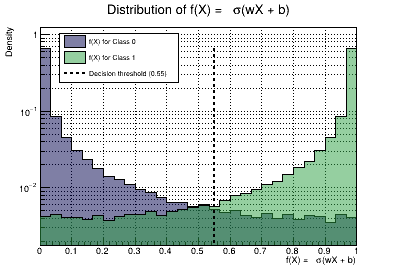

In [ ]:
# Calculate f(X) = σ(wx + b) for both samples
f_X1 = sigmoid(w * X1 + b)  # Predictions for class 0
f_X2 = sigmoid(w * X2 + b)  # Predictions for class 1

# Define custom colors: Class 0 RGB(0, 0, 77) and Class 1 RGB(44, 162, 67)
class0_color = ROOT.TColor.GetColor(0, 0, 77)
class1_color = ROOT.TColor.GetColor(44, 162, 67)

# Plot distributions of f(X) for both samples using ROOT
c3 = ROOT.TCanvas("c3", "Distribution of f(X)", 400, 300)
c3.SetGrid()
c3.SetLogy()
# Create histograms
h1 = ROOT.TH1F("h1", "Distribution of f(X) = #sigma(wX + b);f(X) = #sigma(wX + b);Events [a.u.]", 30, 0, 1)
h2 = ROOT.TH1F("h2", "Distribution of f(X) = #sigma(wX + b);f(X) = #sigma(wX + b);Events [a.u.]", 30, 0, 1)

# Fill histograms
for val in f_X1:
    h1.Fill(val)
    
for val in f_X2:
    h2.Fill(val)

# Normalize to density
if h1.Integral() > 0:
    h1.Scale(1.0 / h1.Integral())
if h2.Integral() > 0:
    h2.Scale(1.0 / h2.Integral())

# Style for class 0
h1.SetFillColorAlpha(class0_color, 0.5)
h1.SetLineColor(ROOT.kBlack)
h1.SetLineWidth(1)

# Style for class 1
h2.SetFillColorAlpha(class1_color, 0.5)
h2.SetLineColor(ROOT.kBlack)
h2.SetLineWidth(1)

# Draw histograms
h1.Draw("HIST")
h2.Draw("HIST SAME")

# Add decision threshold line
line_threshold = ROOT.TLine(0.55, 0, 0.55, max(h1.GetMaximum(), h2.GetMaximum()))
line_threshold.SetLineColor(ROOT.kBlack)
line_threshold.SetLineStyle(2)
line_threshold.SetLineWidth(2)
line_threshold.Draw()

# Add legend
legend3 = ROOT.TLegend(0.15, 0.7, 0.45, 0.88)
legend3.AddEntry(h1, "f(X) for Class 0", "f")
legend3.AddEntry(h2, "f(X) for Class 1", "f")
legend3.AddEntry(line_threshold, "Decision threshold (0.55)", "l")
legend3.Draw()

# Add text with statistics
text1 = ROOT.TLatex()
text1.SetNDC()
text1.SetTextSize(0.03)
text1.SetTextColor(class0_color)
# text1.DrawLatex(0.15, 0.65, f"Class 0: mean={f_X1.mean():.3f}, std={f_X1.std():.3f}")

text2 = ROOT.TLatex()
text2.SetNDC()
text2.SetTextSize(0.03)
text2.SetTextColor(class1_color)
# text2.DrawLatex(0.15, 0.60, f"Class 1: mean={f_X2.mean():.3f}, std={f_X2.std():.3f}")

c3.Draw()

print(f"\nSummary Statistics:")
print(f"Class 0 - f(X) mean: {f_X1.mean():.4f}, std: {f_X1.std():.4f}")
print(f"Class 1 - f(X) mean: {f_X2.mean():.4f}, std: {f_X2.std():.4f}")

# save as pdf
c3.SaveAs("Images/logistic_regression_distribution.pdf")
